Group: Noah Little, Zach Healy, Jack Stout, Jacob Thieret, Justin Kehoe, Collyn Rouggly, Momoh Brema

#### 1. Create a grid of scatter plots with each one representing the sq_ft distribution in a single zipcode, please also include ticks, labels and legend in your plot

#### 2. Create a grid of scatter plots with each one representing the price distribution in a single zipcode, annotate the highest and lowest price ones for each category of real estate: condo, residential and multi-family, please also include ticks, labels and legend in your plot


#### 3. Create a grid of bar plots with each one representing a single zipcode and in that zipcode the sq_ft distribution is grouped by the category of condo, residential and multi-family, please also include ticks, labels and legend in your plot

#### 4. Create a grid of bar plots with each one representing a single zipcode and in that zipcode the price distribution is grouped by the category of condo, residential and multi-family, please also include ticks, labels and legend in your plot

#### 5. Plot the average price distribution based on zipcode for each category of real estate: condo, residential and multi-family, please also include ticks, labels and legend in your plot


#### 6. Plot the average price distribution based on city for each category of real estate: condo, residential and multi-family, please also include ticks, labels and legend in your plot

#### 7. Plot daily gain/loss for January of 2018, annotate the highest daily gain and its date, the highest daily loss and its date in January 2018

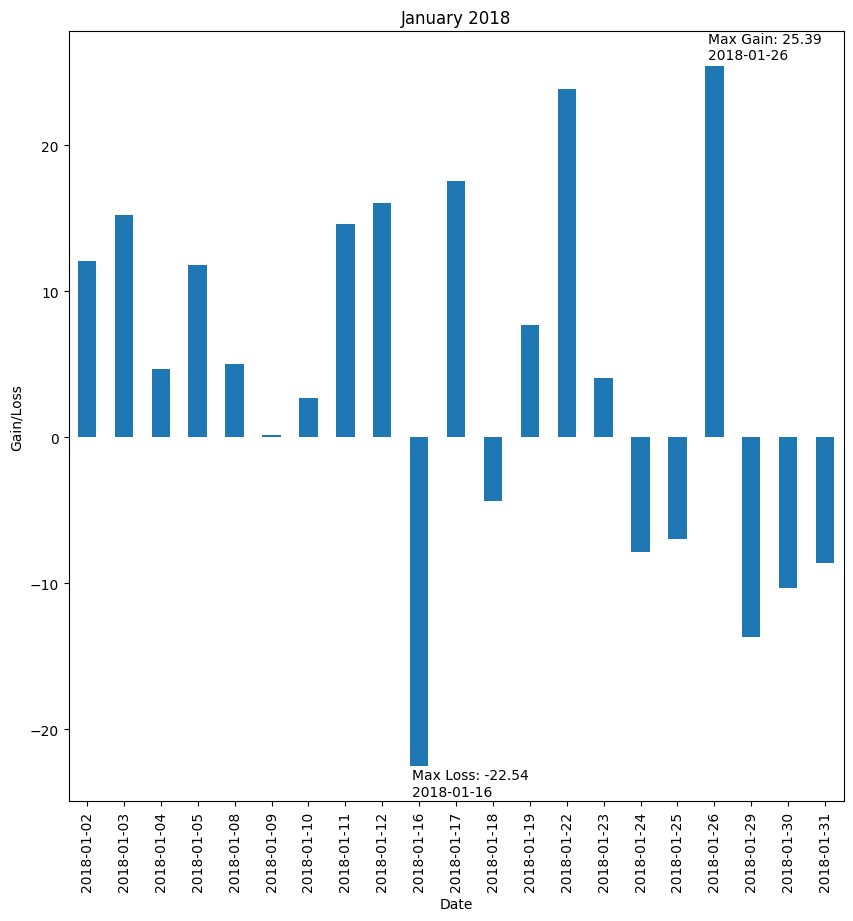

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("SP500.csv")
df_january = df[df['Date'].str.startswith('2018-01')].copy(deep=False)


df_january.loc[:, 'Gain/Loss'] = df_january['Close'] - df_january['Open']
df_january.set_index('Date', inplace=True)

ax = df_january['Gain/Loss'].plot(kind='bar', figsize=(10, 10))

plt.title('January 2018')
plt.xlabel('Date')
plt.ylabel('Gain/Loss')

max_gain = df_january['Gain/Loss'].max()
max_gain_date = df_january['Gain/Loss'].idxmax()
max_loss = df_january['Gain/Loss'].min()
max_loss_date = df_january['Gain/Loss'].idxmin()

for p in ax.patches:
    if p.get_height() == max_gain:
        ax.annotate("Max Gain: " + str(p.get_height().round(2)) + "\n" + max_gain_date,
                    (p.get_x() * 1.005, p.get_height() + 0.5))

    if p.get_height() == max_loss:
        ax.annotate("Max Loss: " + str(p.get_height().round(2)) + "\n" + max_loss_date,
                    (p.get_x() * 1.005, p.get_height() - 2))

plt.show()


#### 8. Make pair plot matrix of January 2018 SP500 data on high, low, adj close and volumn

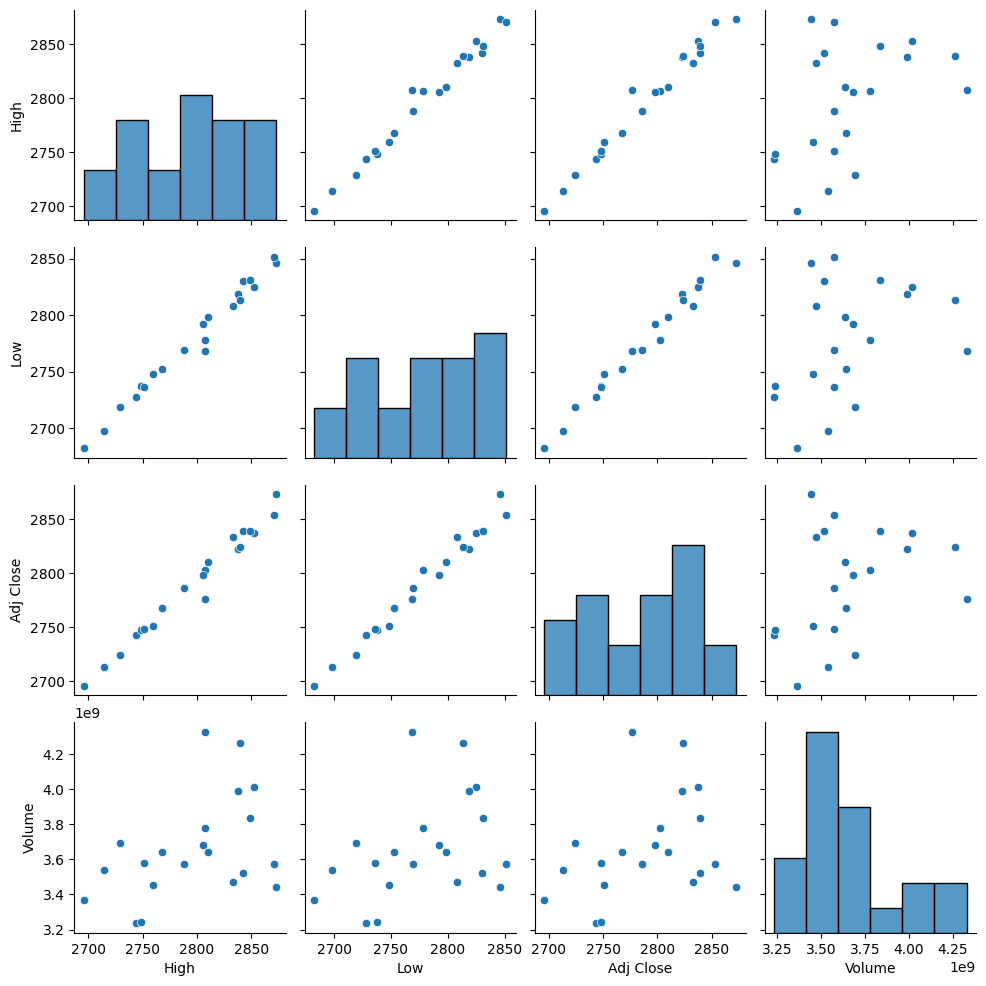

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("SP500.csv")
df_january = df[df['Date'].str.startswith('2018-01')].copy(deep=False)

data = df_january[['High', 'Low', 'Adj Close', 'Volume']]

sns.pairplot(data)
plt.show()
